In [1]:
import pandas as pd
data=pd.read_csv("D:/ML/Practical/ML Dataset/Bengaluru_House_Data.csv")

In [2]:
data.shape

(13320, 9)

In [3]:
print(data.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [4]:
print(data.dtypes)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


In [5]:
# Drop specified columns
data.drop(['availability', 'location', 'society'], axis=1, inplace=True)
# Display the updated dataframe
print(data.head())

              area_type       size total_sqft  bath  balcony   price
0  Super built-up  Area      2 BHK       1056   2.0      1.0   39.07
1            Plot  Area  4 Bedroom       2600   5.0      3.0  120.00
2        Built-up  Area      3 BHK       1440   2.0      3.0   62.00
3  Super built-up  Area      3 BHK       1521   3.0      1.0   95.00
4  Super built-up  Area      2 BHK       1200   2.0      1.0   51.00


In [6]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each categorical column
for col in ['area_type', 'size']:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))
# Display the updated dataframe
print(data.head())

   area_type  size total_sqft  bath  balcony   price
0          3    13       1056   2.0      1.0   39.07
1          2    19       2600   5.0      3.0  120.00
2          0    16       1440   2.0      3.0   62.00
3          3    16       1521   3.0      1.0   95.00
4          3    13       1200   2.0      1.0   51.00


In [7]:
data.isnull().sum() 

area_type       0
size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
duplicate_rows_count = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows_count)


Number of Duplicate Rows: 1332


In [9]:
# Replace NaN values in 'bath' column with mode
bath_mode = data['bath'].mode()[0]
data['bath'].fillna(bath_mode, inplace=True)
# Replace NaN values in 'balcony' column with mode
balcony_mode = data['balcony'].mode()[0]
data['balcony'].fillna(balcony_mode, inplace=True)
data.isnull().sum()

C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\593622547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bath'].fillna(bath_mode, inplace=True)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\593622547.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

area_type     0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
# Check for duplicate rows
duplicate_rows_count = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows_count) 


Number of Duplicate Rows: 0


In [11]:
data.describe()

,area_type,size,bath,balcony,price
count,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000
mean,2.254345,14.903660,2.731952,1.605949,117.362795
std,1.162697,4.608169,1.383452,0.818013,155.561524
min,0.000000,0.000000,1.000000,0.000000,8.000000
25%,2.000000,13.000000,2.000000,1.000000,51.000000
50%,3.000000,16.000000,2.000000,2.000000,75.000000
75%,3.000000,16.000000,3.000000,2.000000,125.000000
max,3.000000,31.000000,40.000000,3.000000,3600.000000


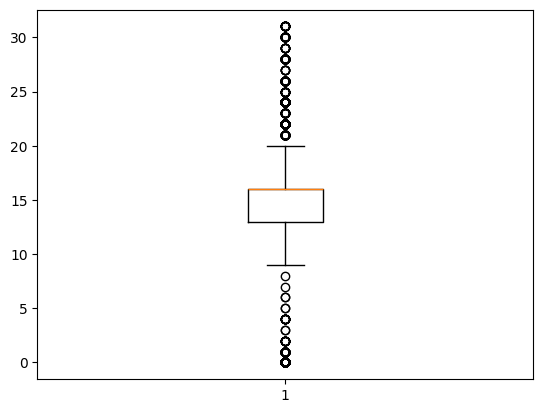

In [12]:
#checking boxplot for size column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['size'])
plt.show()

C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\4084395526.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_LL = int(Q1 - 1.5*IQR)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\4084395526.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_UL = int(Q3 + 1.5*IQR)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\4084395526.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['size']>IQR_UL , 'size'] = int(size_col_df.quantile(q=0.90))
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\4084395526.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['size']<IQR_LL , 's

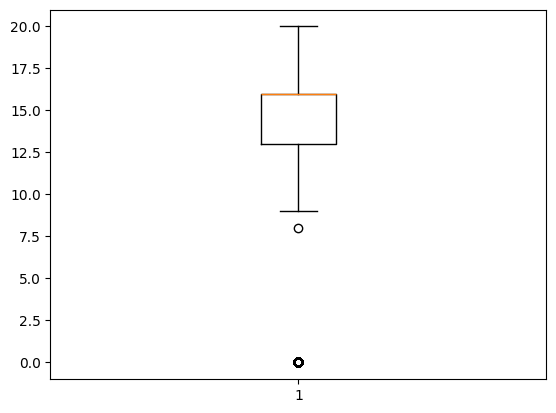

In [13]:
size_col_df = pd.DataFrame(data['size'])
size_median = size_col_df.median()
#getting IQR of Size column
Q3 = size_col_df.quantile(q=0.75)
Q1 = size_col_df.quantile(q=0.25)
IQR = Q3-Q1
#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)
#Finding and treating outliers - both lower and upper end
data.loc[data['size']>IQR_UL , 'size'] = int(size_col_df.quantile(q=0.90))
data.loc[data['size']<IQR_LL , 'size'] = int(size_col_df.quantile(q=0.01))
#checking boxplot for Size column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['size'])
plt.show()

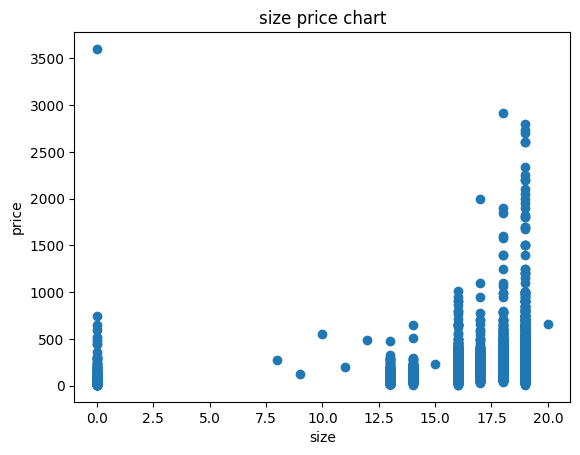

In [14]:
x = data["size"]
y=  data["price"]
plt.scatter(x, y)
plt.title('size price chart')
plt.xlabel('size')
plt.ylabel('price')
plt.show()

C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\2114871786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['size'])  #to see the distribution


<Axes: xlabel='size', ylabel='Density'>

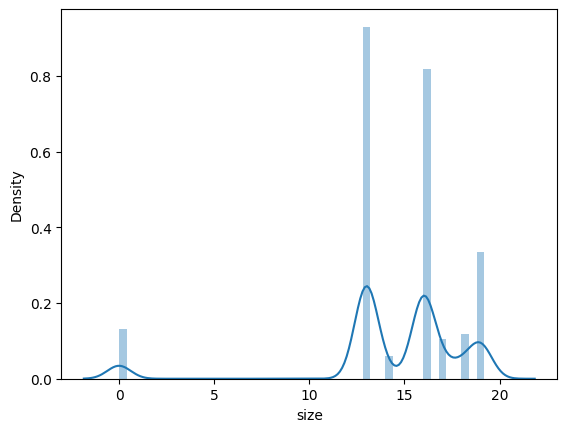

In [15]:
import seaborn as sns
sns.distplot(data['size'])  #to see the distribution

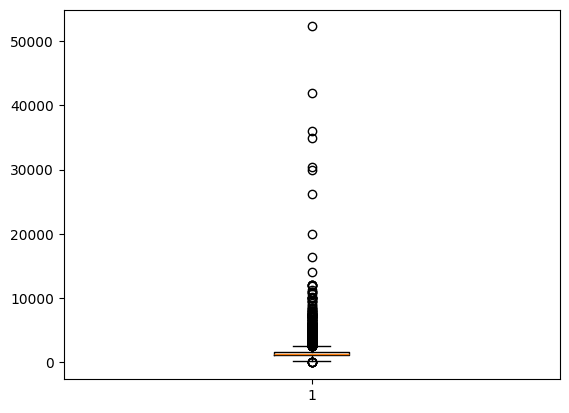

In [16]:
# Assuming data is your DataFrame
# Remove rows where 'total_sqft' cannot be converted to float
data = data[data['total_sqft'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
# Convert 'total_sqft' column to float
data['total_sqft'] = data['total_sqft'].astype(float)
#checking boxplot for total_sqft column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['total_sqft'])
plt.show()

C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\2688451723.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_LL = int(Q1 - 1.5*IQR)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\2688451723.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_UL = int(Q3 + 1.5*IQR)
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\2688451723.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['total_sqft']>IQR_UL , 'total_sqft'] = int(total_col_df.quantile(q=0.90))
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\2688451723.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['total

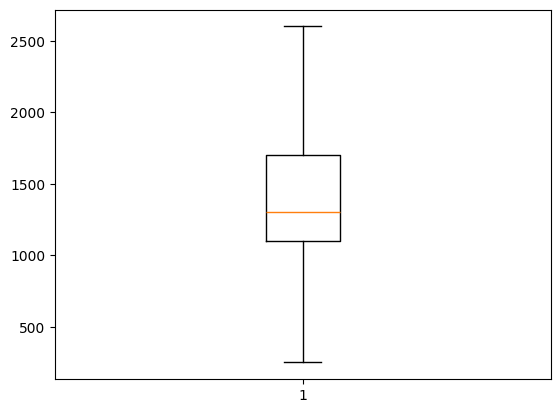

In [17]:
total_col_df = pd.DataFrame(data['total_sqft'])
total_median = total_col_df.median()
#getting IQR of Age column
Q3 = total_col_df.quantile(q=0.75)
Q1 = total_col_df.quantile(q=0.25)
IQR = Q3-Q1
#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)
#Finding and treating outliers - both lower and upper end
data.loc[data['total_sqft']>IQR_UL , 'total_sqft'] = int(total_col_df.quantile(q=0.90))
data.loc[data['total_sqft']<IQR_LL , 'total_sqft'] = int(total_col_df.quantile(q=0.01))

#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['total_sqft'])
plt.show()

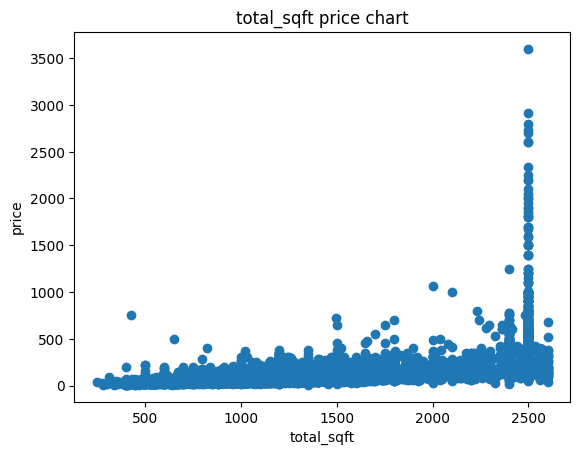

In [18]:
x = data["total_sqft"]
y=  data["price"]
plt.scatter(x, y)
plt.title('total_sqft price chart')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.show()

C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_23020\1469261953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_sqft'])  #to see the distribution


<Axes: xlabel='total_sqft', ylabel='Density'>

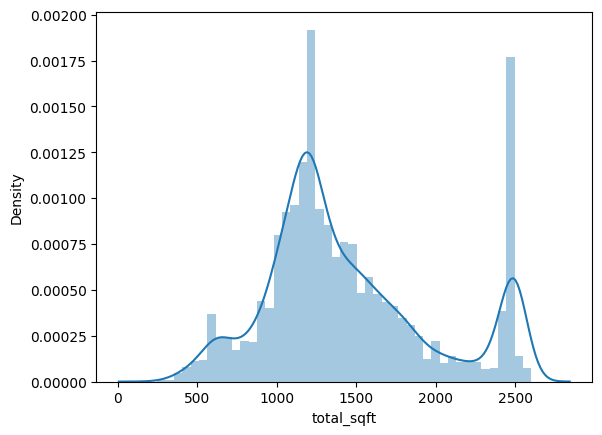

In [19]:
import seaborn as sns
sns.distplot(data['total_sqft'])  #to see the distribution

In [20]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


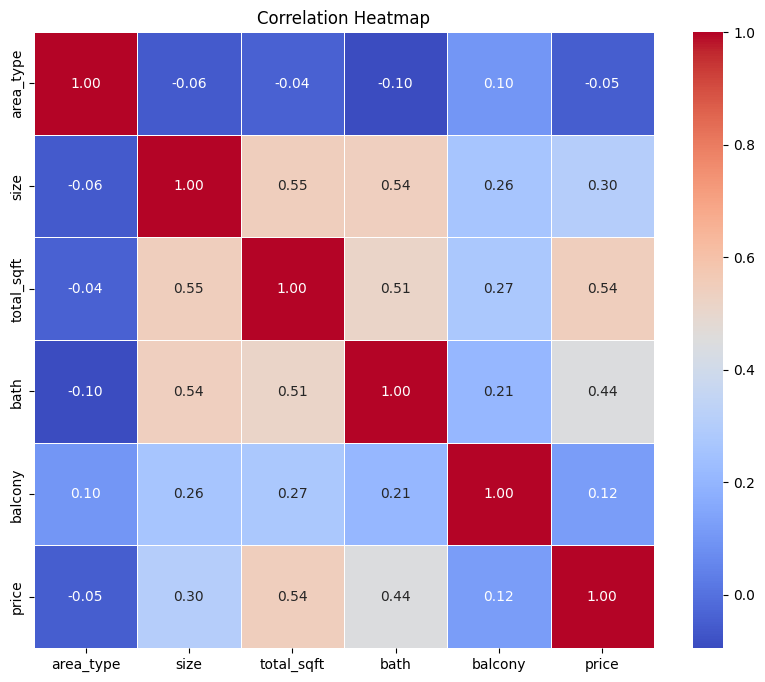

In [21]:
corr_matrix = data.corr()
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data
#converting data back to pandas dataframe
data_scaled = pd.DataFrame(scaled_data)
data_scaled.columns = data.columns
#Separating features and response
features = ["area_type","size", "total_sqft","bath", "balcony"]
response = ["price"]
x=data_scaled[features]
y=data_scaled[response]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
#Fitting lineaar regression model
model = LinearRegression()
model.fit(x_train, y_train)
#Checking accuracy on test data
accuracy = model.score(x_test,y_test)
print(accuracy*100,'%')

44.747400251220135 %


In [24]:
import numpy as np
y_pred = model.predict(x_test)
print('R2_score : ',metrics.r2_score(y_pred,y_test))
print('MSE : ',metrics.mean_squared_error(y_pred,y_test))

R2_score :  -0.08450279182054277
MSE :  0.0007462087685384199


In [25]:
y_test

,price
3590,0.007517
10121,0.032572
11406,0.018653
10783,0.016704
2861,0.172327
...,...
8212,0.009691
2363,0.008533
2509,0.003898
8561,0.074332


In [26]:
y_pred

array([[ 0.01056327],
       [ 0.0713019 ],
       [ 0.0116955 ],
       ...,
       [-0.00185102],
       [ 0.07788075],
       [ 0.0344767 ]])

In [27]:
print(model.intercept_ ) #checking the intercept of model equation

[-0.01292324]


In [28]:
print(model.coef_)   #Checking the coefficients of model equation

[[-0.00070846 -0.01841314  0.0920736   0.31189451 -0.0057448 ]]
